In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os 
import cv2
import glob
import gc


In [3]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 9.9 MB/s 


In [5]:
import os
os.chdir("/content/drive/MyDrive/Image Classification /archive/train")

In [6]:
Name=[]
for file in os.listdir('/content/drive/MyDrive/Image Classification /archive/train'):
    Name+=[file]
print(Name)
print(len(Name))

['lacrosse', 'judo', 'jousting', 'javelin', 'jai alai', 'ice yachting', 'ice climbing', 'hydroplane racing', 'hurdles', 'horseshoe pitching', 'horse racing', 'horse jumping', 'hockey', 'high jump', 'harness racing', 'hang gliding', 'hammer throw', 'golf', 'giant slalom', 'gaga', 'frisbee', 'formula 1 racing', 'football', 'fly fishing', 'figure skating women', 'figure skating pairs', 'figure skating men', 'field hockey', 'fencing', 'disc golf', 'curling', 'croquet', 'cricket', 'chuckwagon racing', 'cheerleading', 'canoe slamon', 'bungee jumping', 'bull riding', 'boxing', 'bowling', 'bobsled', 'bmx', 'billiards', 'bike polo', 'baton twirling', 'basketball', 'baseball', 'barell racing', 'balance beam', 'axe throwing', 'arm wrestling', 'archery', 'ampute football', 'air hockey', 'ultimate', 'tug of war', 'weightlifting', 'volleyball', 'wheelchair basketball', 'water cycling', 'uneven bars', 'wingsuit flying', 'wheelchair racing', 'water polo', 'track bicycle', 'trapeze', 'surfing', 'snowmo

In [7]:
N=[]
for i in range(len(Name)):
    N+=[i]

mapping=dict(zip(Name,N)) 
print(mapping)

{'lacrosse': 0, 'judo': 1, 'jousting': 2, 'javelin': 3, 'jai alai': 4, 'ice yachting': 5, 'ice climbing': 6, 'hydroplane racing': 7, 'hurdles': 8, 'horseshoe pitching': 9, 'horse racing': 10, 'horse jumping': 11, 'hockey': 12, 'high jump': 13, 'harness racing': 14, 'hang gliding': 15, 'hammer throw': 16, 'golf': 17, 'giant slalom': 18, 'gaga': 19, 'frisbee': 20, 'formula 1 racing': 21, 'football': 22, 'fly fishing': 23, 'figure skating women': 24, 'figure skating pairs': 25, 'figure skating men': 26, 'field hockey': 27, 'fencing': 28, 'disc golf': 29, 'curling': 30, 'croquet': 31, 'cricket': 32, 'chuckwagon racing': 33, 'cheerleading': 34, 'canoe slamon': 35, 'bungee jumping': 36, 'bull riding': 37, 'boxing': 38, 'bowling': 39, 'bobsled': 40, 'bmx': 41, 'billiards': 42, 'bike polo': 43, 'baton twirling': 44, 'basketball': 45, 'baseball': 46, 'barell racing': 47, 'balance beam': 48, 'axe throwing': 49, 'arm wrestling': 50, 'archery': 51, 'ampute football': 52, 'air hockey': 53, 'ultimat

In [8]:
X = []
Y = []
for cls in mapping:
    print(cls)
    pth = '/content/drive/MyDrive/Image Classification /archive/train/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(mapping[cls])
print(X)
print(Y)

lacrosse
judo
jousting
javelin
jai alai
ice yachting
ice climbing
hydroplane racing
hurdles
horseshoe pitching
horse racing
horse jumping
hockey
high jump
harness racing
hang gliding
hammer throw
golf
giant slalom
gaga
frisbee
formula 1 racing
football
fly fishing
figure skating women
figure skating pairs
figure skating men
field hockey
fencing
disc golf
curling
croquet
cricket
chuckwagon racing
cheerleading
canoe slamon
bungee jumping
bull riding
boxing
bowling
bobsled
bmx
billiards
bike polo
baton twirling
basketball
baseball
barell racing
balance beam
axe throwing
arm wrestling
archery
ampute football
air hockey
ultimate
tug of war
weightlifting
volleyball
wheelchair basketball
water cycling
uneven bars
wingsuit flying
wheelchair racing
water polo
track bicycle
trapeze
surfing
snowmobile racing
steer wrestling
sumo wrestling
tennis
table tennis
swimming
speed skating
snow boarding
skydiving
sidecar racing
ski jumping
rugby
rowing
shuffleboard
shot put
sky surfing
sailboat racing
rol

error: ignored

In [9]:
X = np.array(X)
X

array([[[139, 137, 137, ..., 151, 159, 163],
        [141, 141, 141, ..., 144, 152, 157],
        [145, 145, 146, ..., 135, 144, 150],
        ...,
        [147, 146, 145, ..., 164, 164, 165],
        [147, 146, 145, ..., 163, 164, 164],
        [147, 146, 145, ..., 163, 164, 164]],

       [[ 44,  44,  48, ..., 109, 104,  94],
        [ 42,  42,  46, ..., 101, 100,  88],
        [ 41,  44,  47, ...,  84,  87,  80],
        ...,
        [104, 105, 118, ...,  92, 102,  95],
        [108, 112, 123, ...,  98, 105,  81],
        [107, 117, 100, ...,  98,  97,  97]],

       [[ 62,  65,  63, ..., 144, 105,  99],
        [ 62,  63,  60, ..., 100, 102, 112],
        [ 62,  61,  58, ...,  85, 110, 134],
        ...,
        [ 78,  79,  82, ...,  58,  60,  60],
        [ 77,  78,  81, ...,  60,  62,  62],
        [ 77,  77,  78, ...,  63,  65,  66]],

       ...,

       [[ 83,  93, 121, ..., 106, 104, 105],
        [ 92, 122, 140, ..., 103, 107, 108],
        [133, 137, 144, ..., 100, 107, 111

In [10]:
Y = np.array(Y)
Y

array([ 0,  0,  0, ..., 99, 99, 99])

In [11]:
##prepare the Data
X_updated=X.reshape(len(X),-1)
X_updated

array([[139, 137, 137, ..., 163, 164, 164],
       [ 44,  44,  48, ...,  98,  97,  97],
       [ 62,  65,  63, ...,  63,  65,  66],
       ...,
       [ 83,  93, 121, ..., 199, 196, 199],
       [150, 150, 149, ...,  54,  92, 103],
       [ 57,  58,  51, ..., 165, 165, 166]], dtype=uint8)

In [12]:
print(X)

[[[139 137 137 ... 151 159 163]
  [141 141 141 ... 144 152 157]
  [145 145 146 ... 135 144 150]
  ...
  [147 146 145 ... 164 164 165]
  [147 146 145 ... 163 164 164]
  [147 146 145 ... 163 164 164]]

 [[ 44  44  48 ... 109 104  94]
  [ 42  42  46 ... 101 100  88]
  [ 41  44  47 ...  84  87  80]
  ...
  [104 105 118 ...  92 102  95]
  [108 112 123 ...  98 105  81]
  [107 117 100 ...  98  97  97]]

 [[ 62  65  63 ... 144 105  99]
  [ 62  63  60 ... 100 102 112]
  [ 62  61  58 ...  85 110 134]
  ...
  [ 78  79  82 ...  58  60  60]
  [ 77  78  81 ...  60  62  62]
  [ 77  77  78 ...  63  65  66]]

 ...

 [[ 83  93 121 ... 106 104 105]
  [ 92 122 140 ... 103 107 108]
  [133 137 144 ... 100 107 111]
  ...
  [195 197 197 ... 205 205 219]
  [167 158 176 ... 214 212 209]
  [161 166 159 ... 199 196 199]]

 [[150 150 149 ... 213 213 214]
  [154 153 152 ... 212 213 214]
  [152 152 153 ... 213 214 214]
  ...
  [ 56  59  54 ...  63  72  77]
  [ 91 102  95 ...  88  97  84]
  [116 122 120 ...  54  92 1

In [13]:
np.unique(Y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [14]:
pd.Series(Y).value_counts()

21    191
22    191
95    190
46    174
12    172
     ... 
9     102
54     99
50     99
61     98
82     59
Length: 100, dtype: int64

In [15]:
X.shape, X_updated.shape

((13572, 200, 200), (13572, 40000))

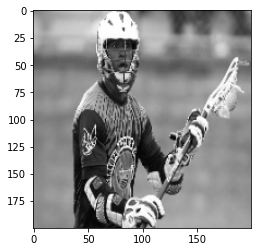

In [16]:
##Visualize the Data
plt.imshow(X[0], cmap='gray')

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [81]:
train_images,train_labels,test_images,test_labels= train_test_split(X_updated, Y, random_state=10,test_size=.20)

In [82]:
##Feature Scaling
train_images=train_images/255.0
test_images=test_images/255.0

In [4]:
def lire_image(img_dir, xdim, ydim, nmax=10000):
    
    label = 0
    label_names = []
    X = []
    y=[]
    for dirname in os.listdir(img_dir):
        if label>10: break
        label_names.append(dirname)
        data_path = os.path.join(img_dir + "/" + dirname,'*g')
        files = glob.glob(data_path)
        n=0
        for f1 in files:
            if n>nmax : break
            img = cv2.imread(f1) # Lecture de l'image dans le repertoire
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Conversion couleur RGB
            img = cv2.resize(img, (xdim,ydim)) # Redimensionnement de l'image
            X.append(np.array(img)) # Conversion en tableau et ajout a la liste des images
            y.append(label) # Ajout de l'etiquette de l'image a la liste des etiquettes
            n=n+1
        print(dirname,': ',n,' images.')
        label = label+1
    X = np.array(X)
    y = np.array(y)
    gc.collect() # Récupération de mémoire
    return X,y, label, label_names

X_train,y_train,Nombre_classes,Classes = lire_image('/content/drive/MyDrive/Image Classification /archive/train/', 100, 100,1000)


ultimate :  99  images.
tug of war :  128  images.
weightlifting :  134  images.
volleyball :  147  images.
wheelchair basketball :  106  images.
water cycling :  103  images.
uneven bars :  158  images.
wingsuit flying :  98  images.
wheelchair racing :  119  images.
water polo :  130  images.
track bicycle :  135  images.


In [5]:
X_test,y_test,Nombre_classes,Classes = lire_image("/content/drive/MyDrive/Image Classification /archive/test/", 100, 100,100)

wingsuit flying :  5  images.
wheelchair racing :  5  images.
water cycling :  5  images.
weightlifting :  5  images.
wheelchair basketball :  5  images.
water polo :  5  images.
tug of war :  5  images.
ultimate :  5  images.
uneven bars :  5  images.
volleyball :  5  images.
track bicycle :  5  images.


In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(Nombre_classes)

(1357, 100, 100, 3)
(1357,)
(55, 100, 100, 3)
(55,)
11


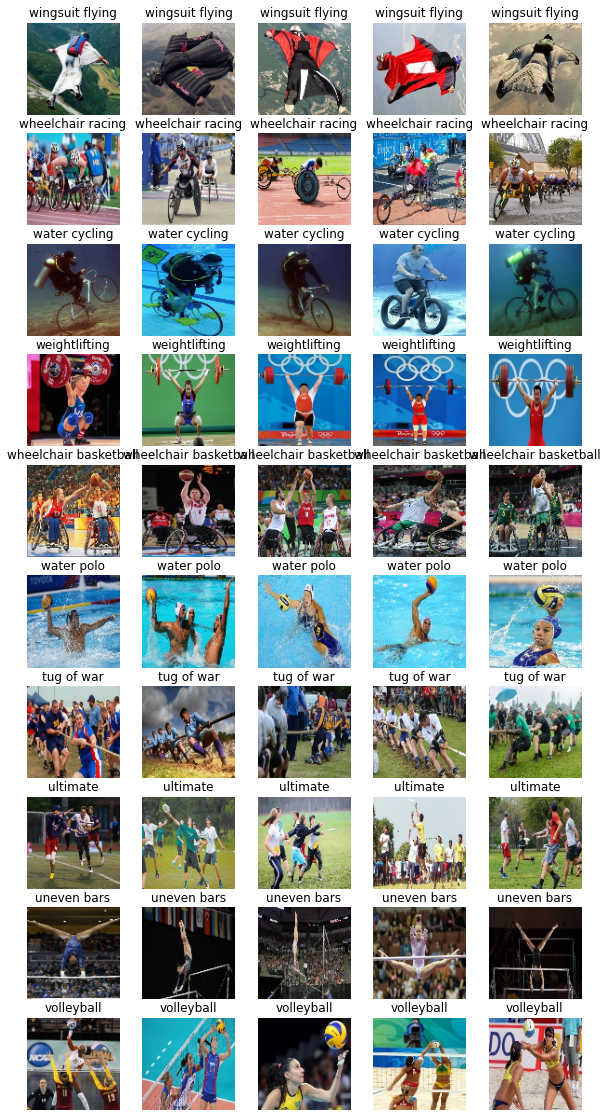

In [7]:
plt.figure(figsize=(10,20))
for i in range(0,50) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X_test[i])
    plt.title(Classes[int(y_test[i])])

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train[0, :])
print(y_test[0, :])

(1357, 100, 100, 3)
(55, 100, 100, 3)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [13]:
from keras.models import Sequential
from keras.layers import Activation, BatchNormalization, Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [14]:
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers.experimental.preprocessing import Rescaling, RandomFlip, RandomRotation, RandomZoom, RandomContrast, RandomTranslation
#from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

#datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
#                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")


data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(20),
    RandomZoom((-0.2,0.2)),
    RandomContrast(0.1),  
    RandomTranslation(0.1,0.1)
])



model_CNN = Sequential()
model_CNN.add(InputLayer(input_shape=(100, 100, 3)))
model_CNN.add(data_augmentation)
model_CNN.add(Conv2D(32, (3, 3), activation='relu'))
model_CNN.add(MaxPooling2D((2, 2)))
model_CNN.add(Conv2D(64, (3, 3), activation='relu'))
model_CNN.add(MaxPooling2D((2, 2)))
model_CNN.add(Conv2D(128, (3, 3), activation='relu'))
model_CNN.add(MaxPooling2D((2, 2)))
model_CNN.add(Conv2D(128, (3, 3), activation='relu'))
model_CNN.add(MaxPooling2D((2, 2)))
model_CNN.add(Flatten())
model_CNN.add(Dense(512, activation='relu'))
model_CNN.add(Dense(11, activation='softmax'))
model_CNN.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)      

In [15]:
model_CNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_CNN = model_CNN.fit(X_train,y_train,batch_size=64,
                          validation_data=(X_test, y_test), 
                          epochs=30, 
                          verbose=1)

model_CNN.summary()

Epoch 1/30
22/22 [==============================] - 31s 1s/step - loss: 2.2866 - accuracy: 0.1437 - val_loss: 2.5237 - val_accuracy: 0.1273
Epoch 2/30
22/22 [==============================] - 27s 1s/step - loss: 1.9899 - accuracy: 0.2756 - val_loss: 2.6766 - val_accuracy: 0.1818
Epoch 3/30
22/22 [==============================] - 32s 1s/step - loss: 1.8810 - accuracy: 0.3183 - val_loss: 2.9366 - val_accuracy: 0.0727
Epoch 4/30
22/22 [==============================] - 29s 1s/step - loss: 1.8361 - accuracy: 0.3427 - val_loss: 2.8788 - val_accuracy: 0.2000
Epoch 5/30
22/22 [==============================] - 27s 1s/step - loss: 1.7527 - accuracy: 0.3699 - val_loss: 3.0678 - val_accuracy: 0.1455
Epoch 6/30
22/22 [==============================] - 27s 1s/step - loss: 1.6996 - accuracy: 0.3876 - val_loss: 3.2217 - val_accuracy: 0.1273
Epoch 7/30
22/22 [==============================] - 28s 1s/step - loss: 1.7454 - accuracy: 0.3795 - val_loss: 3.3440 - val_accuracy: 0.1455
Epoch 8/30
22/22 [==

In [16]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

Score : 18.18%


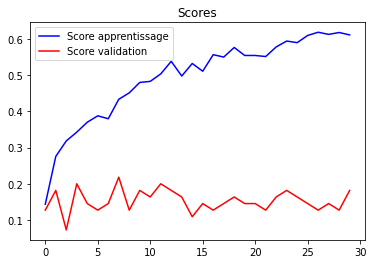

In [17]:
scores = model_CNN.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))
plot_scores(train_CNN)

In [19]:
model_CNN2 = Sequential()
model_CNN2.add(InputLayer(input_shape=(100, 100, 3)))
model_CNN2.add(Conv2D(32, (3, 3), activation='relu'))
model_CNN2.add(MaxPooling2D((2, 2)))
model_CNN2.add(Conv2D(64, (3, 3), activation='relu'))
model_CNN2.add(MaxPooling2D((2, 2)))
model_CNN2.add(Conv2D(128, (3, 3), activation='relu'))
model_CNN2.add(MaxPooling2D((2, 2)))
model_CNN2.add(Conv2D(128, (3, 3), activation='relu'))
model_CNN2.add(MaxPooling2D((2, 2)))
model_CNN2.add(Flatten())
model_CNN2.add(Dense(512, activation='relu'))
model_CNN2.add(Dense(11, activation='softmax'))
model_CNN2.summary()



model_CNN2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_CNN2 = model_CNN2.fit(X_train,y_train,batch_size=64,
                          validation_data=(X_test, y_test), 
                          epochs=30, 
                          verbose=1)

model_CNN2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 10, 10, 128)     

Score : 18.18%


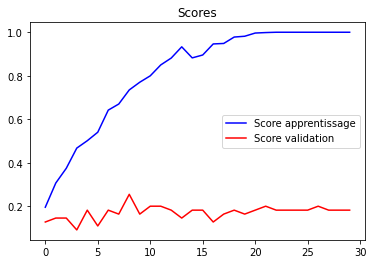

In [20]:
scores = model_CNN2.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))
plot_scores(train_CNN2)